## Ejericicio 1  

Observacion: z = 3er_columna(data) 

N = 2,
M = 1,
P = 24

In [93]:
from matplotlib import pyplot as mpl
import numpy as np 
import os 


data = np.loadtxt(raw_data, delimiter=",",skiprows=1)
x = np.array(data)
z = x[:,-1:].copy()
x[:,-1] = 1
print(data.shape)

(24, 3)


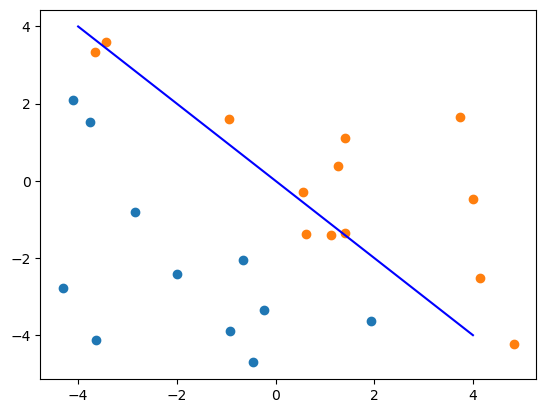

In [94]:
exs = []
eys = []
u = []
p = []
for i in range(24):
    if(z[i] == 1):
        exs.append(x[i][0]) 
        eys.append(x[i][1])
    else: 
        u.append(x[i][0])
        p.append(x[i][1])
mpl.plot(exs,eys,"o",u,p,'o',[4,-4],[-4,4],'b')
mpl.show()

## La funcion XOR es un problema no lineal

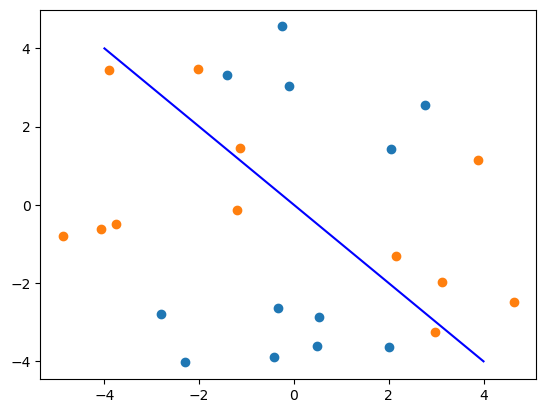

In [105]:
raw_data = open('p11_ej6.csv')
data = np.loadtxt(raw_data, delimiter=",",skiprows=1)
x = np.array(data)
z = x[:,-1:].copy()
x[:,-1] = 1
exs = []
eys = []
u = []
p = []
for i in range(24):
    if(z[i] == 1):
        exs.append(x[i][0]) 
        eys.append(x[i][1])
    else: 
        u.append(x[i][0])
        p.append(x[i][1])
mpl.plot(exs,eys,"o",u,p,'o',[4,-4],[-4,4],'b')
mpl.show()

In [85]:
w = np.random.normal(0,0.1,(N+1,M))

In [86]:
# Cambiamos eta = 0,001
eps = 0.01 
eta = 0.001
E = []
e = 1
t = 0 
pesos = [w]
while (e > eps) and (t < 799):
    y = x @ w 
    d = z - y
    dw = x.T @ d 
    w += eta * dw 
    e = np.mean(np.square(d))
    E.append(e)
    t += 1 
    pesos = np.concatenate((pesos,[w]),axis = 0)

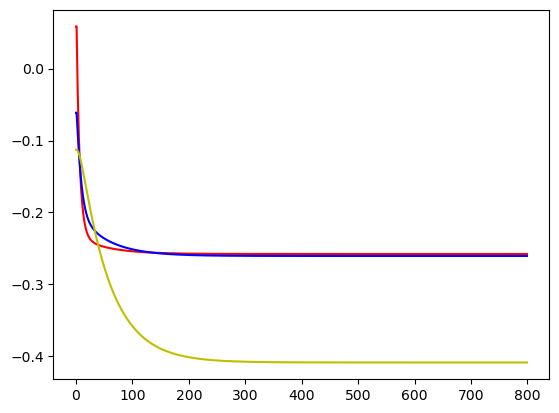

In [87]:
r = np.array([])
b = np.array([])
y = np.array([])
for i in range(len(pesos)):
    r=np.concatenate((r,pesos[i][0]),axis=0)
    b=np.concatenate((b,pesos[i][1]),axis=0)
    y=np.concatenate((y,pesos[i][2]),axis=0)
mpl.plot(r,'r',b,'b',y,'y')
mpl.show()

In [92]:
print(np.concatenate(((x@w)[:10],z[:10])))

[[-0.83918517]
 [ 0.8407459 ]
 [-1.79919982]
 [ 0.16217356]
 [-0.58144821]
 [ 1.60521125]
 [-0.5510988 ]
 [ 1.4241007 ]
 [ 0.54038951]
 [-1.31791791]
 [-1.        ]
 [ 1.        ]
 [-1.        ]
 [ 1.        ]
 [-1.        ]
 [ 1.        ]
 [-1.        ]
 [ 1.        ]
 [ 1.        ]
 [-1.        ]]


Probamos con la funcion sigmoidal

Vemos que el error desciende mas, y mas rapido

In [81]:
w = np.random.normal(0,0.1,(N+1,M))

In [82]:
# Cambiamos a funcion sigmoide
# eta fuera de e5 se ponen feas las predicciones
eps = 0.01 
eta = 1e-5
E = []
e = 1
t = 0 
pesos = [w]
#dY_2 = 1 - np.square(Y_2)
while (e > eps) and (t < 999):
    y = np.tanh(x @ w)
    d = (z - y) * (1-np.square(y))
    dw = x.T @ d 
    w += eta * dw 
    e = np.mean(np.square(d))
    E.append(e)
    t += 1 
    pesos = np.concatenate((pesos,[w]),axis = 0)

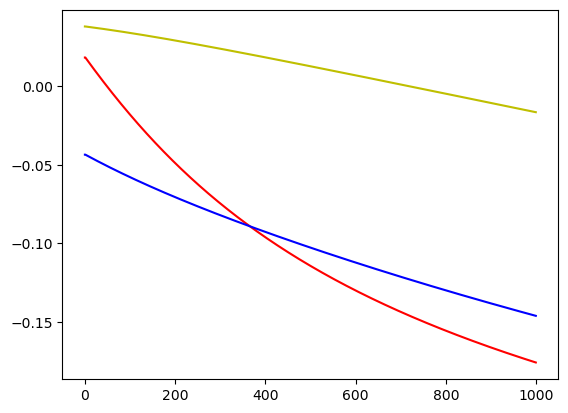

In [83]:
r = np.array([])
b = np.array([])
y = np.array([])
for i in range(len(pesos)):
    r=np.concatenate((r,pesos[i][0]),axis=0)
    b=np.concatenate((b,pesos[i][1]),axis=0)
    y=np.concatenate((y,pesos[i][2]),axis=0)
mpl.plot(r,'r',b,'b',y,'y')
mpl.show()

In [84]:
print((x@w)[:10])
print(z[:10])

[[-0.29799943]
 [ 0.71286225]
 [-0.91339146]
 [ 0.42083142]
 [-0.08415182]
 [ 1.22679406]
 [-0.24722968]
 [ 1.14620722]
 [ 0.60500073]
 [-0.65157394]]
[[-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]]


## Ejercicio 2: OCR

In [226]:
r = open('letras.txt')
letras = np.loadtxt(r)
A_dat = np.array(letras)
print(A_dat.shape)

(130, 5)


In [227]:
letras_entrenamiento = []
z = np.identity(26)
for i in range(26):
    letras_entrenamiento.append([])
    for j in range(5): 
        for h in range(5): 
            letras_entrenamiento[i].append(A_dat[j+i*5][h])
    letras_entrenamiento[i].append(-1)
letras_entrenamiento = np.array(letras_entrenamiento)

In [228]:
w = np.random.normal(0,0.1,(25+1,26))

eps = 0.0001
eta = 1e-5
E = []
e = 1
t = 0 
while (e > eps) and (t < 799):
    y = np.tanh(letras_entrenamiento @ w )
    d = z - y
    dw = letras_entrenamiento.T @ d 
    w += eta * dw 
    e = np.mean(np.square(d))
    E.append(e)
    t += 1 

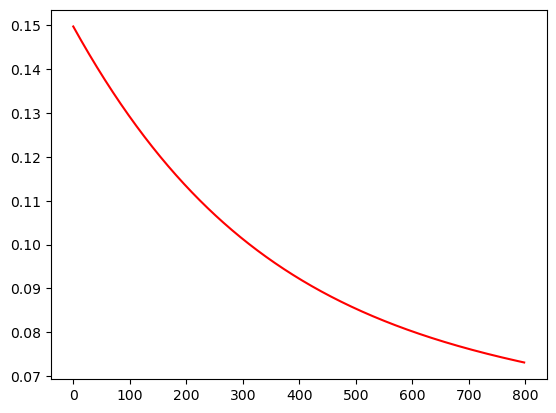

In [229]:
mpl.plot(E,'r')

In [235]:
v = letras_entrenamiento @ w 
print(v[0])
print(z[0])

[-0.11595999  0.05552121  0.18428521  0.07949633 -0.33924608  0.07534347
 -0.26963898 -0.30436973  0.27775574  0.22989481 -0.12254015 -0.22134293
  0.20836125 -0.50196724  0.13241339 -0.03641811  0.15372678  0.22080115
  0.13851162 -0.105483   -0.02994827 -0.18744256 -0.02169281 -0.0012363
  0.00358487  0.04866639]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
